# Do it! 판다스 입문
## 12. 시계열 데이터
### 12-1. datetime라이브러리의 오브젝트 
- date: 날짜
- time: 시간
- datetime: 날짜와 시간


**1) datetime 오브젝트 사용**
1. datetime 라이브러리 불러오기

In [2]:
from datetime import datetime

2. 현재 시간 출력

In [3]:
now1 = datetime.now()
print(now1)

2024-03-28 22:20:58.250362


In [4]:
now2 = datetime.today()
print(now2)

2024-03-28 22:20:58.258059


3. 시간 직접 입력 -> datetime 오브젝트 생성하기

In [5]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2024-03-28 22:20:58.274758
1970-01-01 00:00:00
1970-12-12 13:24:34


4. 시간 계산

In [6]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

19810 days, 22:20:58.274758
<class 'datetime.timedelta'>


In [7]:
diff2 = t2 - t1

print(diff2)
print(type(diff2))

-19811 days, 1:39:01.725242
<class 'datetime.timedelta'>


**2) datetime 오브젝트로 변환하기 - to_datetime 매서드**

1. 데이터 집합 불러오기

In [8]:
import pandas as pd
import os

ebola = pd.read_csv('./data/country_timeseries.csv')

2. 데이터 프레임 살펴보기

In [9]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. Date열의 자료형 변환: to_datetime 메서드

In [10]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. 시간형식 지정자(%ㅇ, %m, %y)와 기호(/,-) 조합 -> format인자 -> 형식에 맞게 정리된 datetime오브젝트 얻을 수 O

In [11]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [12]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


**시간 형식 지정자**  
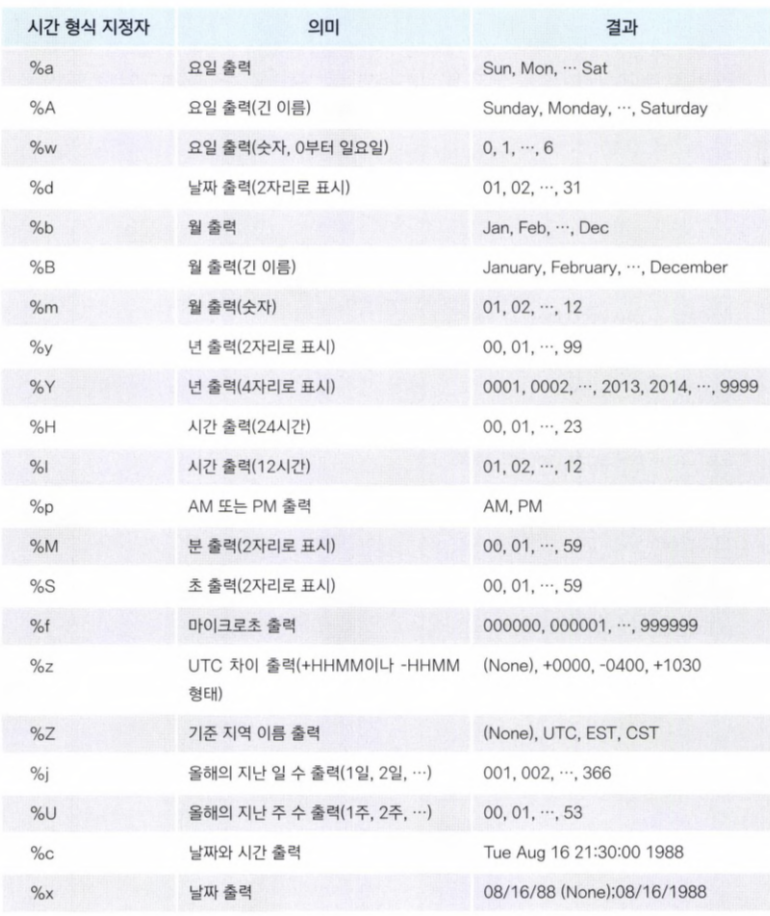
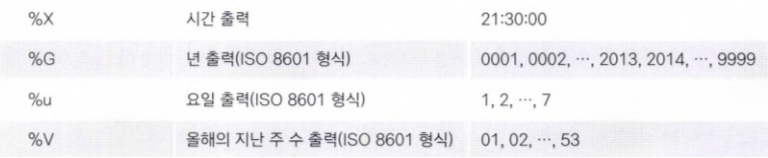

※ 시계열 데이터 구분해서 추출하기

In [13]:
now = datetime.now()
print(now)

2024-03-28 22:20:59.226829


In [14]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2024-03-28


In [15]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

22:20:59


In [16]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2024-03-28 22:20:59


**3) datetime 오브젝트로 변환하기: 변환하려는 열 지정하여 데이터 집합 불러오기 - read_csv 메서드**

In [17]:
ebola1 = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

**4) datetime 오브젝트에서 날짜 정보 추출하기**

1. 문자열로 지정된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

In [18]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트의 year, month, day 속성 이용 -> 년, 월, 일 정보 바로 추출

In [19]:
print(d1[0].year)

2018


In [20]:
print(d1[0].month)

5


In [21]:
print(d1[0].day)

16


**5) df 접근자 사용하기**

1. 데이터 집합 불러오기 + 오브젝트 변환하여 새로운 열로 추가

In [22]:
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

2. dt 접근자 사용X -> 인덱스 3인 데이터의 년, 월, 일 데이터 추출

In [23]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [24]:
print(ebola['date_dt'][3].year)

2015


In [25]:
print(ebola['date_dt'][3].month)

1


In [26]:
print(ebola['date_dt'][3].day)

2


3. dt 접근자 이용하여 년 데이터 추출-> 추출한 연도값 새로운 열로 추가

In [27]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


4. dt 접근자 이용하여 월, 일 데이터 한번에 추출 -> 새로운 열로 추가

In [28]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


5. 자료형 확인

In [29]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### 12-2. 사례별 시계열 데이터 계산하기

**1) 에볼라 최초 발병일 계산하기**

1. 데이터 살펴보기: 시간이 역순으로 정렬됨 -> 시간순으로 살펴보기 위해 마지막부터 살펴볼 것

In [30]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


2. 최초 발병일 찾기: min 메서드

In [31]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. 에볼라의 진행정도 파악하기: 최초발병일 빼기

In [32]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


**2) 파산한 은행의 개수 계산하기** 

1. 데이터 집합 불러오고 데이터 자료형 살펴보기

In [33]:
banks = pd.read_csv('./data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


2. 문자열로 저장된 두 열을 datetime 오브젝트로 변환하기

In [34]:
banks_no_dates = pd.read_csv('./data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [35]:
banks = pd.read_csv('./data/banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


C:\Users\leehj\AppData\Local\Temp\ipykernel_28140\2524140533.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('./data/banklist.csv', parse_dates=[5,6])
C:\Users\leehj\AppData\Local\Temp\ipykernel_28140\2524140533.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('./data/banklist.csv', parse_dates=[5,6])


3. 은행 파산한 분기 파악하기: dt접근자 & quarter속성 이용 -> 새로운 열로 추가

In [36]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

4. 연도별 파산한 은행의 개수: groupby 메서드 이용

In [37]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


5. 각 연도별, 분기별 파산한 은행의 개수: 연도별 그룹화 후 다시 분기별 그룹화 

In [38]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)                               

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

6. 5의 값 그래프로 출력하기

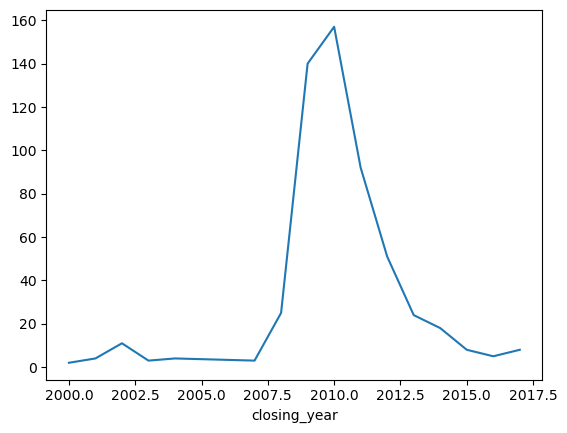

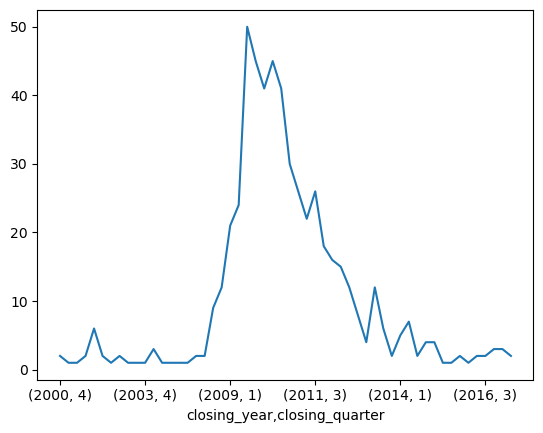

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

**3) 테슬라 주식 데이터로 시간 계산하기**

1. get_data_quanal 메서드에 TSLA라는 문자열 전달-> 테슬라 주식데이터 내려받기  
-> to_csv 메서드 사용하여 data 폴더 안에 'tesla_stock_quandl.csv'로 저장

In [40]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
# tesla에는 데이터프레임이 저장
#tesla = pdr.get_data_quandl('TSLA', api_key = 'XAG3xzekWg-8ybV1XAWd')
# tesla에 저장된 데이터프레임을 파일로 저장합니다. 
#tesla.to_csv('./data/tesla_stock_quandl.csv')

In [41]:
tesla = pd.read_csv('./data/tesla_stock_quandl.csv', parse_dates=[0])

2. datetime 오브젝트로 자료형 변환

In [42]:
print(tesla.head())

        Date    Open    High     Low   Close      Volume  ExDividend  \
0 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


3. Date열을 Datetime형으로 변환

In [43]:
tesla = pd.read_csv('./data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


4. dt접근자 이용: 2010년 6월 데이터 추출

In [44]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


**4) datetime 오브젝트와 인덱스 - DatetimeIndex**  
datetime 오브젝트를 데이터 프레임의 인덱스로 설정 -> 원하는 시간의 데이터 바로 추출가능

1. Date 열을 tesla 데이터프레임의 인덱스로 지정

In [45]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


2. datetime 오브젝트를 인덱스로 지정 -> 원하는 시간의 데이터 바로 추출

In [46]:
print(tesla.loc['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


3. 2010년 6월의 데이터 추출

In [47]:
print(tesla.loc['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


**6) 시간 간격과 인덱스 - TimedeltaIndex**

1. 데이터 수집 이후 시간이 얼마나 흘렀는가: ref_date열 추가

In [48]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

2. ref_date열을 인덱스로 지정

In [49]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


3. 시간간격(ref_date) 이용하여 데이터 추출하기: 데이터 수집 이후 최초의 5일의 데이터

In [50]:
print(tesla['5 days':].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


**7) 시간 범위와 인덱스**

1. 2015년 1월 1일 데이터 누락

In [51]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


2. 2014년 3월 23일 데이터 누락

In [52]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


3. date_range메서드: 시간 인덱스 생성

In [53]:
head_range = pd.date_range(start='2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


4. 원본 데이터 손상방지 위해 새로운 데이터 프레임 생성  
(반드시 Date열  인덱스로 지정 후 시간범위를 인덱스로 지정하기)

In [54]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


※ 시간 범위의 주기 설정하기
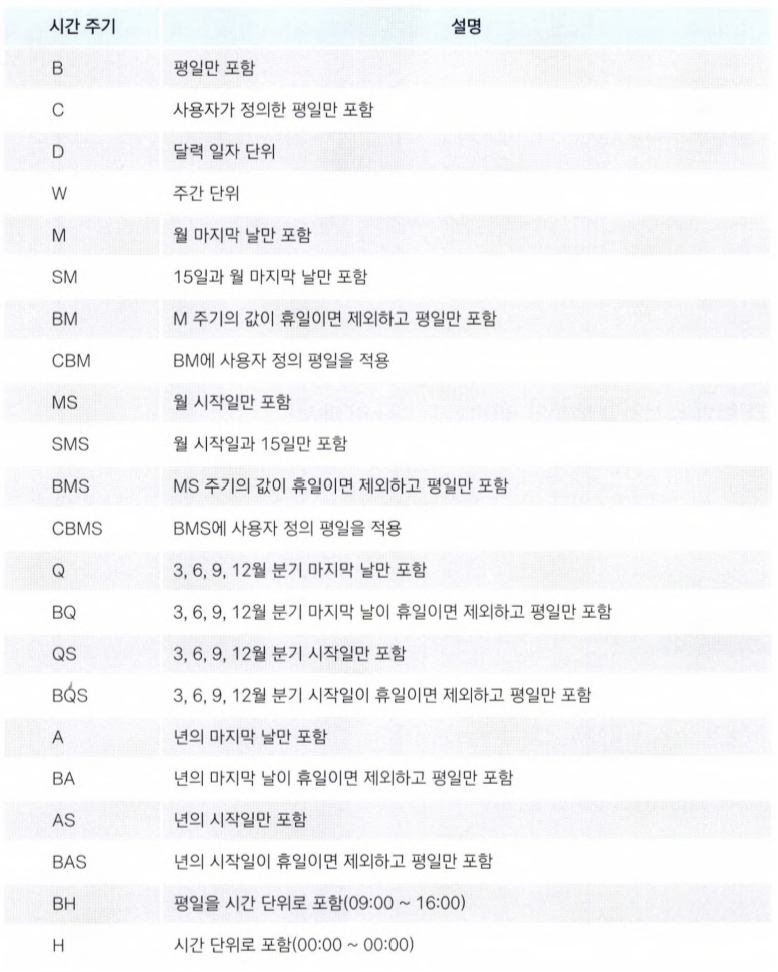
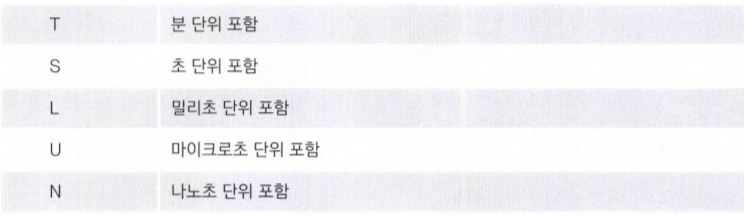  
data_range 메서드의 freq 인잣값을 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만든 것 

In [55]:
print(pd.date_range('2017-01-02', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


**8) 시간범위 수정하고 데이터 밀어내기 - shift 메서드**

에볼라 확산속도 비교하기  
1. x축: Date 열, y축: 사망자 수

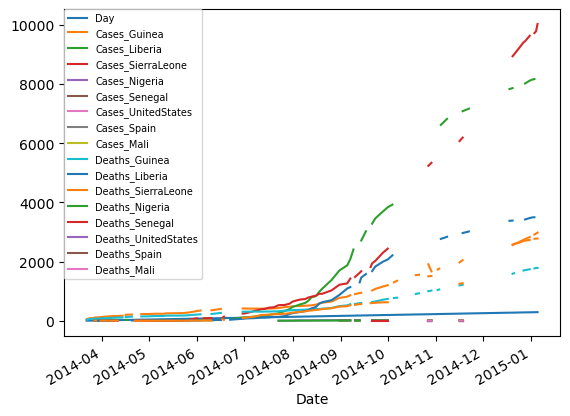

In [56]:
import matplotlib.pyplot as plt 

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax = ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

2. 나라별 에볼라의 확산 속도 비교  
   : 발병일이 달라, 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 함.

In [57]:
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


ex. Liberia 발병일을 4만큼 옮겨야함

3. 그래프를 그리기 위한 데이터프레임 준비하기: 날짜가 없는 데이터도 포함시켜야함

In [58]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])

In [59]:
print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [60]:
print(ebola.tail().iloc[:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


4. Date열을 인덱스로 지정 -> 시간범위(Date열의 최댓값~최솟값) 생성하여 new_idx에 저장

In [61]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

5. new_idx의 시간 순서 맞추기: reversed 메서드 사용

In [62]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [63]:
new_idx = reversed(new_idx)

6. new_idx를 새로운 인덱스로 지정: reindex 메서드

In [64]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [65]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


7. 각 나라의 에볼라 발병일 옮기기: last_valid_index, first_valid_index 메서드 사용  
   -> 유효한 값이 있는 첫번째(가장 오래된)와 마지막(가장 최근의) 인덱스 반환

In [66]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [67]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


8. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기기  
   : 에볼라가 가장 처음 발병한 날(earliest_date) - 각 나라의 에볼라 발병일(shift_values)

In [68]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [82]:
# shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


9. 각 나라의 에볼라 발병일 옮기기: shift 메서드 - 인잣값만큼 데이터를 밀어내는 메서드  
    :모든 열의 값을 shift_values 값만큼 옮기기

In [76]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values.iloc[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

10. ebola_dict 값을 데이터 프레임으로 변환

In [77]:
ebola_shift = pd.DataFrame(ebola_dict)

11. 최초 발병일(2014-03-22)을 기준으로 모든 열의 데이터가 옮겨짐.

In [78]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

12. Day열을 인덱스로 지정, 필요없는 열 삭제

In [80]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis =1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

13. 새로운 데이터 프레임으로 다시 그래프 그리기: X축이 Day로 변경됨

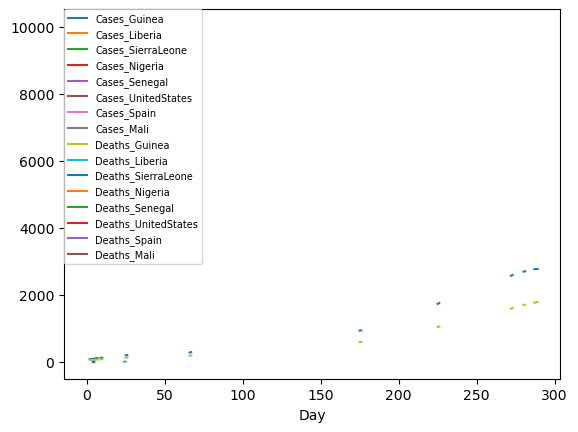

In [81]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize = 7, loc =2, borderaxespad = 0.)
plt.show()